In [1]:
#This is a new notebook for use with real data. We totally won't try to divide by zero this time.

In [12]:
import batman
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline


In [3]:
def chisqa (data, model):
    chi = 0
    
    for i in range(len(data)):
        num = (data[i]-model[i])**2
        denom = model[i]
        summ = num/denom
        chi = chi + summ
    chisum = np.sum(chi)
    return chisum
    

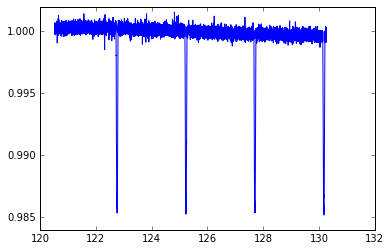

In [17]:
import astropy.io.ascii
table = astropy.io.ascii.read('kepler1b.txt')
time = table['time']
flux = table['flux']
nflux = flux/np.median(flux)
uncertainty = table['uncertainty']
plt.plot(time, nflux)



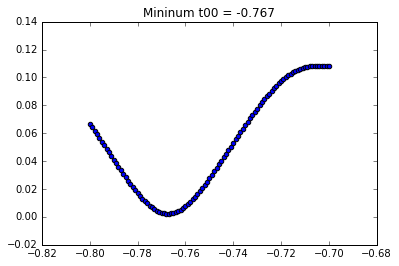

In [24]:
params = batman.TransitParams()
params.t0 = 0.0                      #time of inferior conjunction
params.per = 2.47061317              #orbital period
params.rp = 0.1281                   #planet radius (in units of stellar radii)
params.a = 7.903                     #semi-major axis (in units of stellar radii)
params.inc = 83.872                  #orbital inclination (in degrees)
params.ecc = 0.0                     #eccentricity
params.w = 0.0                       #longitude of periastron (in degrees)
params.u = [0.1, 0.3]                #limb darkening coefficients
params.limb_dark = "quadratic"       #limb darkening model


plotting = False


t00 = np.arange(-.8, -0.7, 0.001)
chiSq = np.array([])
for i in t00:

    # set the model t0 to one value of t00
    params.t0 = i
    m = batman.TransitModel(params, time)
    modelflux = m.light_curve(params)
    chiSq = np.append(chiSq, chisqa(nflux, modelflux))

    if plotting:
        plt.plot(time, modelflux, color='orange', linewidth=3)
        plt.scatter(time, nflux)
        plt.title("t0 = {}, chi^2 = {}".format(i, chiSq[-1]))
        plt.show()
plt.scatter(t00, chiSq)
mint00 = t00[np.argmin(chiSq)]
#print chiSq
plt.title("Mininum t00 = {}".format(mint00))



In [28]:
t00 = np.arange(-.8, -0.7, 0.001)
chiSq = np.array([])
rp0 = np.arange(0.1, 2, 0.1)
chiSq2 = np.array([])

for i in t00:

    # set the model t0 to one value of t00
    params.t0 = i
    m = batman.TransitModel(params, time)
    modelflux = m.light_curve(params)
    chiSq = np.append(chiSq, chisqa(nflux, modelflux))
    for j in rp0:
        params.rp = j
        m = batman.TransitModel(params, time)
        modelflux2 = m.light_curve(params)
        chiSq2 = np.append(chiSq2, chisqa(nflux, modelflux2))
chichi = np.array([chiSq, chiSq2])
        
print np.shape(chiSq)
print np.shape(chiSq2)

/Users/zactaylor/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in double_scalars


KeyboardInterrupt: 